# Notebook to Look at SMELT results 


In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import os
import numpy as np

from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools)

%matplotlib inline

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
def results_dataset(results_dir, date, ndays, period, grid_type):
    datestr = date.strftime('%Y%m%d')
    dateend = date + datetime.timedelta(days=ndays-1)
    dateendstr = dateend.strftime('%Y%m%d')
    fname = os.path.join(results_dir,
                        'SalishSea_{}_{}_{}_{}.nc'.format(period, datestr, dateendstr, grid_type))
    print (fname)
    grid = nc.Dataset(fname)
    return grid

In [3]:
mesh_mask = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone.nc')
tmask = mesh_mask.variables['tmask'][:]

grid_B = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_downonegrid.nc')
bathy, lons, lats = tidetools.get_bathy_data(grid_B)

final = '/results/SalishSea/nowcast-green/20apr16/'
date = datetime.datetime(2016, 4, 20)
ptrc_T = results_dataset(final, date, 1, '1h', 'ptrc_T')
nitrateF = ptrc_T.variables['NO3'][:,:,:,:]
print (nitrateF.shape)

initial = '/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/initial_green/BioIC_SMELT_v1.nc'
ni = nc.Dataset(initial)
nitrate0 = ni.variables['NO3'][0,:]

/results/SalishSea/nowcast-green/20apr16/SalishSea_1h_20160420_20160420_ptrc_T.nc
(24, 40, 898, 398)


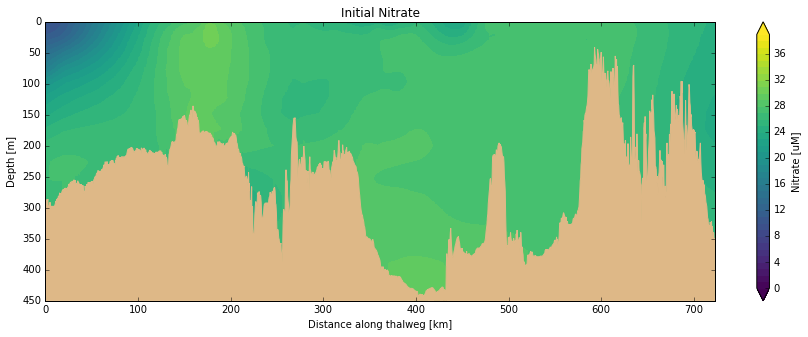

In [4]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(0., 40., 1)
cbar = vis.contour_thalweg(ax, nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Initial Nitrate')

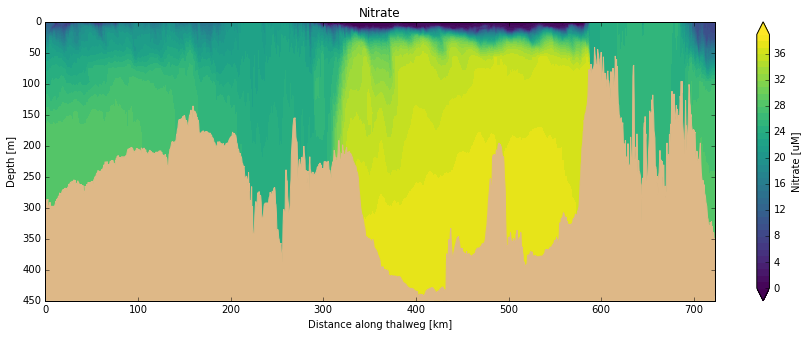

In [5]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, nitrateF[23], bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Nitrate')

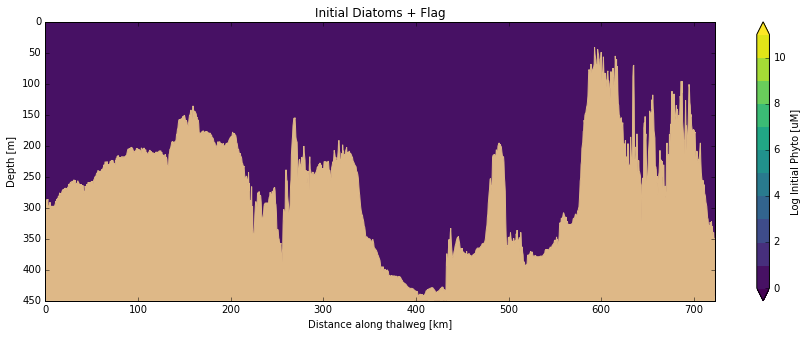

In [6]:
phyto0 = ni.variables['PHY'][0,:] + ni.variables['PHY2'][0,:]
clevels = np.arange(0, 12, 1.)
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, phyto0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Log Initial Phyto [uM]')
ax.set_title('Initial Diatoms + Flag');

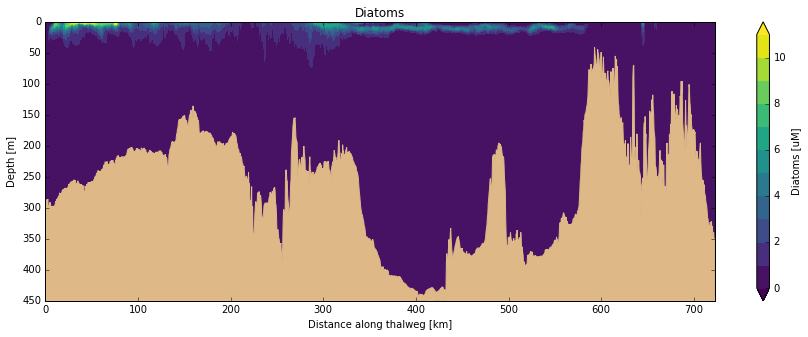

In [7]:
diatoms = ptrc_T.variables['PHY2'][23,:,:,:]
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, diatoms, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Diatoms [uM]')
ax.set_title('Diatoms');

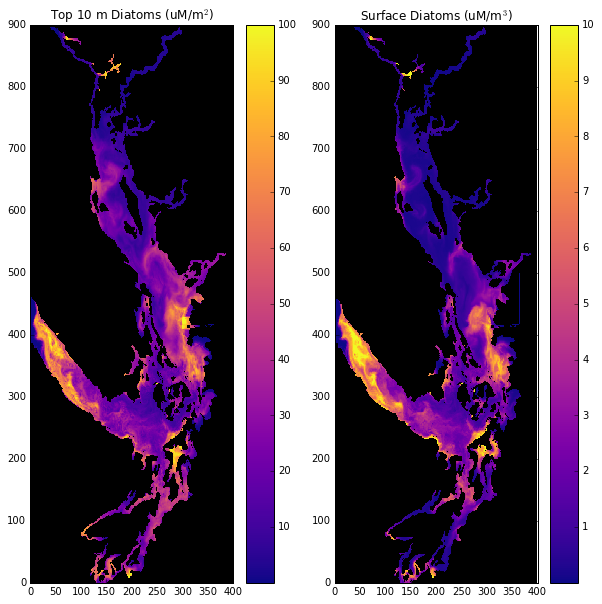

In [8]:
diatoms_masked = np.ma.array(diatoms[0:10], mask=np.logical_not(tmask[0, 0:10]))
sum_diatoms = np.sum(diatoms_masked, axis=0)
fig, ax = plt.subplots(1, 2, figsize=(10,10))
cmap = plt.get_cmap('plasma')
cmap.set_bad('black')
mesh = ax[0].pcolormesh(sum_diatoms, cmap=cmap, vmax = 100)
fig.colorbar(mesh, ax=ax[0])
ax[0].set_title('Top 10 m Diatoms (uM/m$^2$)')
mesh = ax[1].pcolormesh(diatoms_masked[0], cmap=cmap, vmax = 10)
fig.colorbar(mesh, ax=ax[1])
ax[1].set_title('Surface Diatoms (uM/m$^3$)')

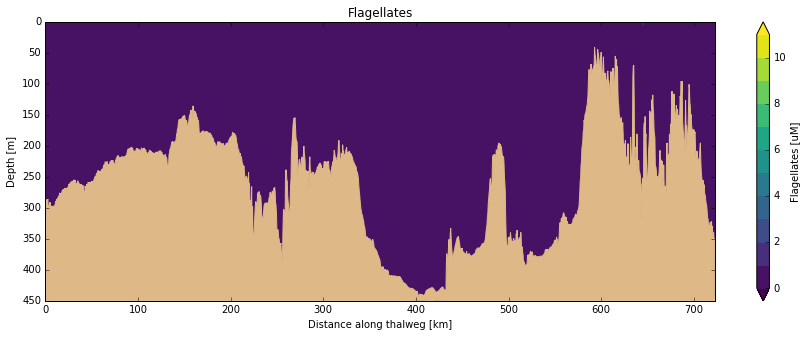

In [9]:
flag = ptrc_T.variables['PHY'][23,:,:,:]
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, flag, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Flagellates [uM]')
ax.set_title('Flagellates');

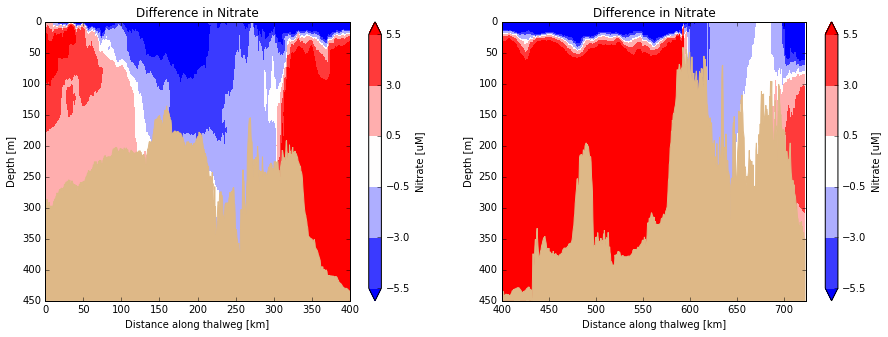

In [10]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
clevels = [-5.5, -3, -0.5, 0.5, 3, 5.5]

cbar = vis.contour_thalweg(ax[0], nitrateF[4]-nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax[0].set_ylim([450,0])
ax[0].set_xlim([0,400])
cbar.set_label('Nitrate [uM]')
ax[0].set_title('Difference in Nitrate')

cbar = vis.contour_thalweg(ax[1], nitrateF[4]-nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax[1].set_ylim([450,0])
ax[1].set_xlim([400, 724])
cbar.set_label('Nitrate [uM]')
ax[1].set_title('Difference in Nitrate')

In [12]:
print (ptrc_T.variables.keys())
#nitrateF = ptrc_T.variables['NO3'][:,:,:,:]


odict_keys(['DOC', 'MICZ', 'MYRI', 'NH4', 'NO3', 'O2', 'PHY', 'PHY2', 'POC', 'Si', 'bSi', 'deptht', 'deptht_bounds', 'nav_lat', 'nav_lon', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds'])


In [13]:
for v in ptrc_T.variables.keys():
    print (v, np.max(ptrc_T.variables[v][:]))

DOC 25.5253
MICZ 5.14045
MYRI 1.96697
NH4 6.65452
NO3 39.842
O2 2.62262e+25
PHY 5.03702
PHY2 23.2166
POC 1.81386
Si 80.9401
bSi 9.93847
deptht 441.466
deptht_bounds 454.932
nav_lat 51.1048
nav_lon -121.318
time_centered 3670183800.0
time_centered_bounds 3670185600.0
time_counter 3670183800.0
time_counter_bounds 3670185600.0


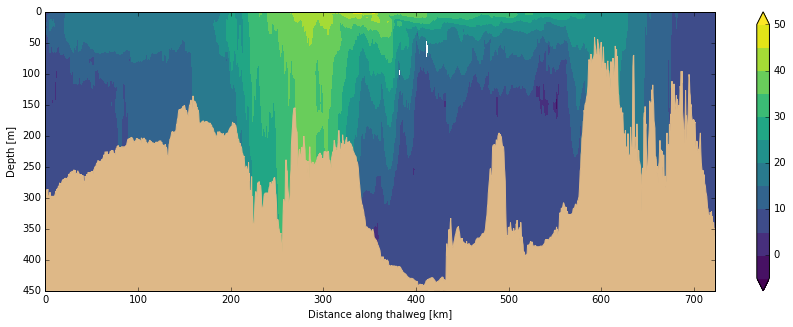

In [17]:
oxy = ptrc_T.variables['O2'][23, :]
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, np.log(oxy), bathy, lons, lats, mesh_mask, 'gdept_0', 10, cmap='viridis')
ax.set_ylim([450,0]);


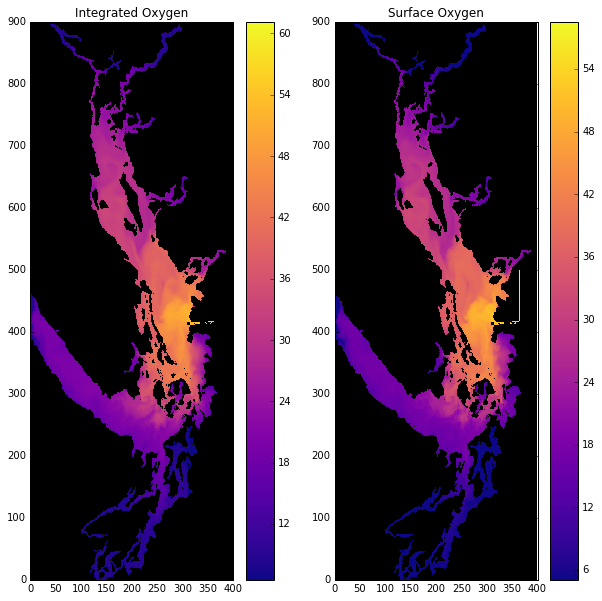

In [20]:
oxy_masked = np.ma.array(oxy, mask=np.logical_not(tmask[0]))
sum_oxy = np.sum(oxy_masked, axis=0)
fig, ax = plt.subplots(1, 2, figsize=(10,10))
cmap = plt.get_cmap('plasma')
cmap.set_bad('black')
mesh = ax[0].pcolormesh(np.log(sum_oxy), cmap=cmap)
fig.colorbar(mesh, ax=ax[0])
ax[0].set_title('Integrated Oxygen')
mesh = ax[1].pcolormesh(np.log(oxy_masked[0]), cmap=cmap)
fig.colorbar(mesh, ax=ax[1])
ax[1].set_title('Surface Oxygen')

Oxygen in Fraser River is blowing up.